NO. OF ROWS AND COLUMNS: (8807, 12)

COLUMNS:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

FIRST 5 ROWS:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

BASIC STATISTICS:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


COLUMNS THAT HAS NULL VALUE:


C:\Users\Admin\AppData\Local\Temp\ipykernel_8364\1947264346.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Available', inplace=True)                                    #fill them
C:\Users\Admin\AppData\Local\Temp\ipykernel_8364\1947264346.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

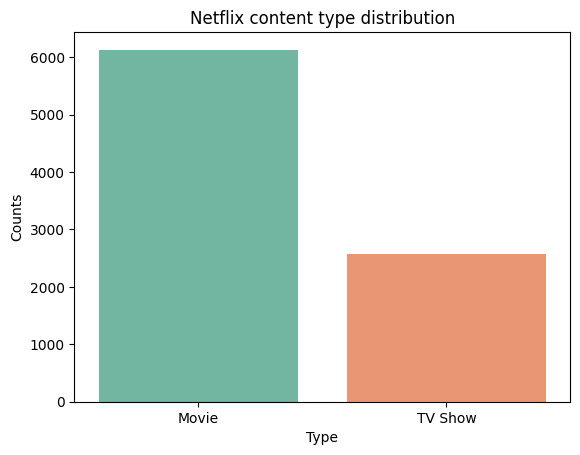

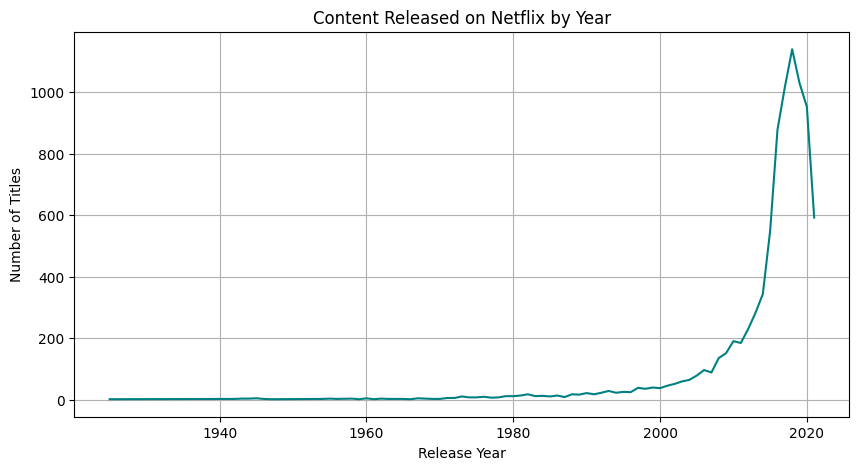

C:\Users\Admin\AppData\Local\Temp\ipykernel_8364\1947264346.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


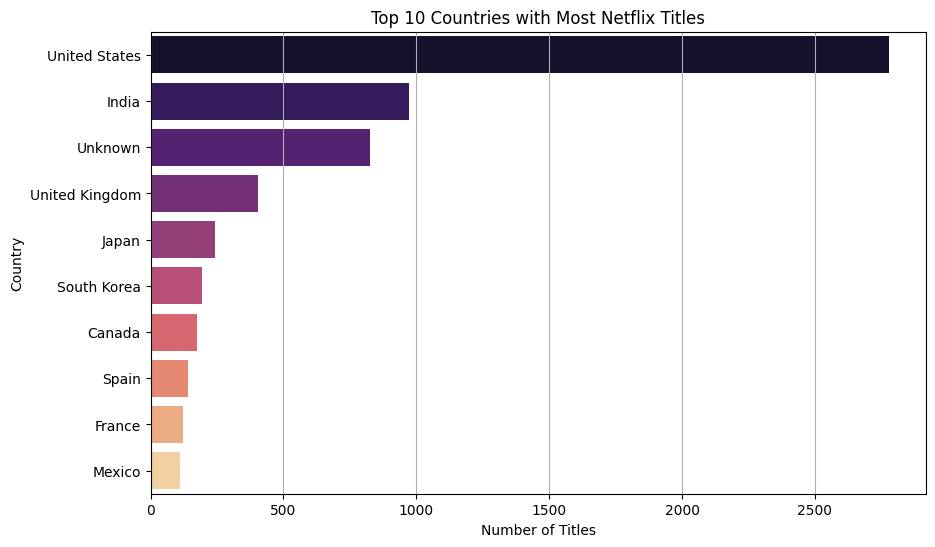

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


df=pd.read_csv('../data/netflix_titles.csv')                                             #Load and Read dataset

 
print("NO. OF ROWS AND COLUMNS:", df.shape)                                              #Initial data exploration
print("\nCOLUMNS:")
print(df.columns)
print("\nFIRST 5 ROWS:")
display(df.head())
print("\nDATAFRAME INFO:")
df.info()
print("\nBASIC STATISTICS:")
display(df.describe())


print("COLUMNS THAT HAS NULL VALUE:")                                                   #Cleaning data   
df.isnull().sum()                                                                       #find missing values

df['director'].fillna('Not Available', inplace=True)                                    #fill them      
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown',inplace=True)

df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')                       #object to string
df.dropna(subset=['date_added'],inplace=True)                                           #drop because only 10 rows

df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['duration'].fillna('Unknown',inplace=True)


                                                                                       # EDA
df['type'].value_counts() 
sns.countplot(data=df , x='type' ,palette='Set2') 
plt.title('Netflix content type distribution') 
plt.xlabel('Type')
plt.ylabel('Counts')
plt.show()                                                         

content_by_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, color='teal')
plt.title('Content Released on Netflix by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

top_countries=df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()